## Multiple linear regression

### Multiple features
 In the original version of linear regression, you had a single feature x, the size of the house and you're able to predict y, the price of the house. The model was fwb of x equals wx plus b.

<br>
<img src="../../img/coursera/supervised/lr/lr_with_single_feature.png" width="450"/>
<br>

 if you did not only have the size of the house as a feature with which to try to predict the price, but if you also knew the number of bedrooms, the number of floors and the age of the home in years, etc...

<br>
<img src="../../img/coursera/supervised/lr/lr_multiple_features.png" width="450"/>
<br>

More features you have it seems like this would give you a lot more information with which to predict the price
To introduce a little bit of new notation, we're going to use the variables X_1, X_2, X_3 and X_4.

As a concrete example, X superscript in parentheses 2, will be a vector of the features for the second training example, so it will equal to this 1416, 3, 2 and 40. Sometimes this is called a row vector rather than a column vector.

<br>
<img src="../../img/coursera/supervised/lr/lr_multiple_features2.png" width="450"/>
<br>

Sometimes in order to emphasize that this X^2 is not a number but is actually a list of numbers that is a vector, we'll draw an arrow on top of that just to visually show that is a vector and over here as well.

Now that we have multiple features, let's take a look at what a model would look like.

<br>
<img src="../../img/coursera/supervised/lr/lr_model_multiparams.png" width="450"/>
<br>

You can think of this 0.1 as saying that maybe for every additional square foot, the price will increase by 0.1 1,000 or by 100, because we're saying that for each square foot, the price increases by 0.1, times 1,000, which is 100. Maybe for each additional bathroom, the price increases by 4,000  and for each additional floor the price may increase by 10,000 and for each additional year of the house's age, the price may decrease by 2,000, because the parameter is negative 2.


<br>
<img src="../../img/coursera/supervised/lr/dot_product.png" width="450"/>
<br>

The dot products of two vectors of two lists of numbers W and X, is computed by checking the corresponding pairs of numbers, W_1 and X_1 multiplying that, W_2 X_2 multiplying that, W_3 X_3 multiplying that, all the way up to W_n and X_n multiplying that and then summing up all of these products.

<br>
<img src="../../img/coursera/supervised/lr/lr_multiple_features2.png" width="500"/>
<br>

<img src="../../img/coursera/supervised/lr/question_multiple_lr.png" width="500"/>
<br>





## Vectorization
<br>
<img src="../../img/coursera/supervised/multiple_lr/vectorization_part1.png" width="500"/>
<br>

Vectorization makes your code shorter, so hopefully easier to write and easier for you or others to read, and it also makes it run much faster. But honest, this magic behind vectorization that makes this run so much faster.


<br>
<img src="../../img/coursera/supervised/multiple_lr/vectorization_part2.png" width="500"/>
<br>

For loop:
The for loop like this runs without vectorization. If j ranges from 0 to say 15, this piece of code performs operations one after another.

<br>

Vectorization:
The computer hardware with vectorization. The computer can get all values of the vectors w and x, and in a single-step, it multiplies each pair of w and x with each other all at the same time in parallel.


<br>
<img src="../../img/coursera/supervised/multiple_lr/vectorization_part2.png" width="500"/>
<br>

Maybe the speed difference won't be huge if you have 16 features, but if you have thousands of features and perhaps very large training sets, this type of vectorized implementation will make a huge difference in the running time of your learning algorithm.

<br>
<img src="../../img/coursera/supervised/multiple_lr/vectorization_example3.png" width="500"/>
<br>

## Python, NumPy and Vectorization Example

Let's explore some operations using vectors.
<a name="toc_40015_3.4.1"></a>
### 1 Indexing
Elements of vectors can be accessed via indexing and slicing. NumPy provides a very complete set of indexing and slicing capabilities. Reference [Slicing and Indexing](https://NumPy.org/doc/stable/reference/arrays.indexing.html) for more details.
**Indexing** means referring to *an element* of an array by its position within the array.
**Slicing** means getting a *subset* of elements from an array based on their indices.
NumPy starts indexing at zero so the 3rd element of an vector $\mathbf{a}$ is `a[2]`.

In [23]:
import numpy as np  # it is an unofficial standard to use np for numpy
import time

#vector indexing operations on 1-D vectors
a = np.arange(10)
print(a)

#access an element
print(f"a[2].shape: {a[2].shape} a[2]  = {a[2]}, Accessing an element returns a scalar")

# access the last element, negative indexes count from the end
print(f"a[-1] = {a[-1]}")

#indexs must be within the range of the vector or they will produce and error
try:
    c = a[10]
except Exception as e:
    print("The error message you'll see is:")
    print(e)

[0 1 2 3 4 5 6 7 8 9]
a[2].shape: () a[2]  = 2, Accessing an element returns a scalar
a[-1] = 9
The error message you'll see is:
index 10 is out of bounds for axis 0 with size 10


### 2 Slicing
Slicing creates an array of indices using a set of three values (`start:stop:step`). A subset of values is also valid. Its use is best explained by example:

In [24]:
#vector slicing operations
a = np.arange(10)
print(f"a         = {a}")

#access 5 consecutive elements (start:stop:step)
c = a[2:7:1];
print("a[2:7:1] = ", c)

# access 3 elements separated by two
c = a[2:7:2];
print("a[2:7:2] = ", c)

# access all elements index 3 and above
c = a[3:];
print("a[3:]    = ", c)

# access all elements below index 3
c = a[:3];
print("a[:3]    = ", c)

# access all elements
c = a[:];
print("a[:]     = ", c)

a         = [0 1 2 3 4 5 6 7 8 9]
a[2:7:1] =  [2 3 4 5 6]
a[2:7:2] =  [2 4 6]
a[3:]    =  [3 4 5 6 7 8 9]
a[:3]    =  [0 1 2]
a[:]     =  [0 1 2 3 4 5 6 7 8 9]


### 3 Single vector operations
There are a number of useful operations that involve operations on a single vector.

In [25]:
a = np.array([1, 2, 3, 4])
print(f"a             : {a}")
# negate elements of a
b = -a
print(f"b = -a        : {b}")

# sum all elements of a, returns a scalar
b = np.sum(a)
print(f"b = np.sum(a) : {b}")

b = np.mean(a)
print(f"b = np.mean(a): {b}")

b = a ** 2
print(f"b = a**2      : {b}")

a             : [1 2 3 4]
b = -a        : [-1 -2 -3 -4]
b = np.sum(a) : 10
b = np.mean(a): 2.5
b = a**2      : [ 1  4  9 16]


### 4 Vector Vector element-wise operations
Most of the NumPy arithmetic, logical and comparison operations apply to vectors as well. These operators work on an element-by-element basis. For example
$$ c_i = a_i + b_i $$

In [26]:
a = np.array([1, 2, 3, 4])
b = np.array([-1, -2, 3, 4])
print(f"Binary operators work element wise: {a + b}")

Binary operators work element wise: [0 0 6 8]


Of course, for this to work correctly, the vectors must be of the same size:

In [27]:
#try a mismatched vector operation
a = np.array([1, 2, 3, 4, 5])
c = np.array([1, 2])
try:
    d = a + c
except Exception as e:
    print("The error message you'll see is:")
    print(e)

The error message you'll see is:
operands could not be broadcast together with shapes (5,) (2,) 


### 5 Scalar Vector operations
Vectors can be 'scaled' by scalar values. A scalar value is just a number. The scalar multiplies all the elements of the vector.

In [28]:
a = np.array([1, 2, 3, 4])

# multiply a by a scalar
b = 5 * a
print(f"b = 5 * a : {b}")

b = 5 * a : [ 5 10 15 20]


### 6 Vector Vector dot product
The dot product is a mainstay of Linear Algebra and NumPy. This is an operation used extensively in this course and should be well understood. The dot product is shown below.

<img src="../../img/coursera/supervised/multiple_lr/dot_product.gif" width="650"/>
<br>

The dot product multiplies the values in two vectors element-wise and then sums the result. Vector dot product requires the dimensions of the two vectors to be the same.
Let's implement our own version of the dot product below:

**Using a for loop**, implement a function which returns the dot product of two vectors. The function to return given inputs $a$ and $b$:
$$ x = \sum_{i=0}^{n-1} a_i b_i $$
Assume both `a` and `b` are the same shape.

In [29]:
def my_dot(a, b):
    """
   Compute the dot product of two vectors

    Args:
      a (ndarray (n,)):  input vector
      b (ndarray (n,)):  input vector with same dimension as a

    Returns:
      x (scalar):
    """
    x = 0
    for i in range(a.shape[0]):
        x = x + a[i] * b[i]
    return x


# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
print(f"my_dot(a, b) = {my_dot(a, b)}")

my_dot(a, b) = 24


Let's try the same operations using np.dot.

In [30]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
c = np.dot(a, b)
print(f"NumPy 1-D np.dot(a, b) = {c}, np.dot(a, b).shape = {c.shape} ")
c = np.dot(b, a)
print(f"NumPy 1-D np.dot(b, a) = {c}, np.dot(a, b).shape = {c.shape} ")

NumPy 1-D np.dot(a, b) = 24, np.dot(a, b).shape = () 
NumPy 1-D np.dot(b, a) = 24, np.dot(a, b).shape = () 


### 7 The Need for Speed: Vector vs For loop
We utilized the NumPy library because it improves speed memory efficiency. Let's demonstrate:
So, vectorization provides a large speed up in this example. This is because NumPy makes better use of available data parallelism in the underlying hardware. GPU's and modern CPU's implement Single Instruction, Multiple Data (SIMD) pipelines allowing multiple operations to be issued in parallel. This is critical in Machine Learning where the data sets are often very large.

In [31]:
np.random.seed(1)
a = np.random.rand(10000000)  # very large arrays
b = np.random.rand(10000000)

tic = time.time()  # capture start time
c = np.dot(a, b)
toc = time.time()  # capture end time

print(f"np.dot(a, b) =  {c:.4f}")
print(f"Vectorized version duration: {1000 * (toc - tic):.4f} ms ")

tic = time.time()  # capture start time
c = my_dot(a, b)
toc = time.time()  # capture end time

print(f"my_dot(a, b) =  {c:.4f}")
print(f"loop version duration: {1000 * (toc - tic):.4f} ms ")

del (a);
del (b)  #remove these big arrays from memory

np.dot(a, b) =  2501072.5817
Vectorized version duration: 11.5621 ms 
my_dot(a, b) =  2501072.5817
loop version duration: 4502.3260 ms 


## Gradient descent for multiple linear regression

<img src="../../img/coursera/supervised/multiple_lr/gradient_descent_for_multiple_linear.png" width="650"/>
<br>

Here's what gradient descent looks like. We're going to repeatedly update each parameter w_j to be w_j minus Alpha times the derivative of the cost J, where J has parameters w_1 through w_n and b. Once again, we just write this as J of vector w and number b. Let's see what this looks like when you implement gradient descent and in particular, let's take a look at the derivative term.

<img src="../../img/coursera/supervised/multiple_lr/gradient_descent_for_multiple_linear.png" width="650"/>
<br>

The formula for the derivative of J with respect to w_1 on the right looks very similar to the case of one feature on the left. The error term still takes a prediction f of x minus the target y. One difference is that w and x are now vectors and just as w on the left has now become w_1 here on the right

<img src="../../img/coursera/supervised/multiple_lr/gradient_descent_for_multiple_linear2.png" width="650"/>
<br>

## 1.3 Notation

<img src="../../img/coursera/supervised/multiple_lr/notation.png" width="900"/>
<br>


### Matrix X containing our examples
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} =
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1}
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.

Display the input data.

In [32]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.

For demonstration, $\mathbf{w}$ and $b$ will be loaded with some initial selected values that are near the optimal. $\mathbf{w}$ is a 1-D NumPy vector.

In [33]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


### Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

In [34]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b
    return p


# get a row from our training data
x_vec = X_train[0, :]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


### Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [35]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b  #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i]) ** 2  #scalar
    cost = cost / (2 * m)  #scalar
    return cost


# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


### Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

### Compute Gradient with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an
- outer loop over all m examples.
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.

In [36]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape  #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw


#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


### Gradient Descent With Multiple Variables
The routine below implements equation (5) above.

In [37]:
import copy, math
import numpy as np


def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w, b)  ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw  ##None
        b = b - alpha * dj_db  ##None

        # Save cost J at each iteration
        if i < 100000:  # prevent resource exhaustion
            J_history.append(cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history  #return final w,b and J history for graphing


# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                            compute_cost, compute_gradient,
                                            alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m, _ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


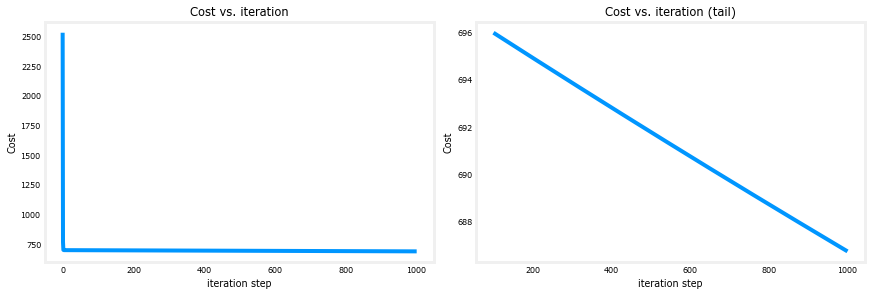

In [38]:
import matplotlib.pyplot as plt

# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration")
ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

### Practice quiz: Multiple linear regression

<img src="../../img/coursera/supervised/multiple_lr/questions.png" width="700"/>
<br>

### Feature scaling

Technique called feature scaling that will enable gradient descent to run much faster.

<img src="../../img/coursera/supervised/features_scaling_params.png" width="700"/>
<br>

<img src="../../img/coursera/supervised/features_scaling_and_gradient.png" width="700"/>
<br>

if you run gradient descent on a cost function to find on this, re scaled x1 and x2 using this transformed data, then the contours will look more like this more like circles and less tall and skinny. And **gradient descent can find a much more direct path to the global minimum.**

You can implement feature scaling, to take features that take on very different ranges of values and skill them to have comparable ranges of values to each other:
<br>
One way to get a scale version of x_1 is to take each original x1_ value and divide by 2,000, the maximum of the range. The scale x_1 will range from 0.15 up to one. Similarly, since x_2 ranges from 0-5, you can calculate a scale version of x_2 by taking each original x_2 and dividing by five, which is again the maximum.


<img src="../../img/coursera/supervised/feature_scaling_example.png" width="700"/>
<br>

By Mean Normalization, you may find that the average of feature 1, Mu_1 is 600 square feet. Let's take each x_1, subtract the mean Mu_1, and then let's divide by the difference 2,000 minus 300, where 2,000 is the maximum and 300 the minimum, and if you do this, you get the normalized x_1 to range from negative 0.18-0.82. Similarly, to mean normalized x_2, you can calculate the average of feature 2. For instance, Mu_2 may be 2.3. Then you can take each x_2, subtract Mu_2 and divide by 5 minus 0. Again, the max 5 minus the mean, which is 0. The mean normalized x_2 now ranges from negative 0.46-0 54. If you plot the training data using the mean normalized x_1 and x_2, it might look like this.

<img src="../../img/coursera/supervised/feature_scaling_mean_normalization.png" width="700"/>
<br>

To implement Z-score normalization, you need to calculate something called the standard deviation of each feature. sometimes also called the Gaussian distribution, this is what the standard deviation for the normal distribution looks like.

<img src="../../img/coursera/supervised/feature_scaling_zi_score.png" width="700"/>
<br>

<img src="../../img/coursera/supervised/feature_scaling_when.png" width="700"/>
<br>

### Question

Which of the following is a valid step used during feature scaling?
<br>

<img src="../../img/coursera/supervised/feature_scaling_question_1.png" width="400"/>
<br>

<img src="../../img/coursera/supervised/feature_scaling_question_1_answer.png" width="700"/>
<br>

### Choosing the learning rate

Concretely, if you plot the cost for a number of iterations and notice that the costs sometimes goes up and sometimes goes down, you should take that as a clear sign that gradient descent is ***not working properly.***
